#01NAEX project 01

Team members: Matýsek Trödler, Dejfik Rendl, Míša Bohatý, Martínek Kunz

# Research task:

The goal of this research task is to determine the effect of varying parameters on the frequency (or period) of a pendulum with small-angle approximation (https://en.wikipedia.org/wiki/Pendulum_(mechanics)).


# Description:

You can have the same number of operators as team members. Choose at least three operators to run the experiment, i.e. pendulum swinging and frequency measurement.
You will measure with 3 different  lengths whose levels are 0.5m, 1m, 1.5m and two different weights and two different angles of deflection. Measure the frequency (or period) of the pendulum for each combination. In total, each operator will take 12 measurements.


# Submission:

Submit the elaborated measurement by October 20, 2023 in pdf/ Rmd /ipynb format (Python or R).


# Questions:


##Q1.
Measure the data and set up the experiment so that it is *randomized*. Be sure to record the order of the measurements, type of rope, number of weights, and the operator (member of the group taking the measurements) for each measurement. Each operator should conduct one measurement for each combination of rope length and number of weights and angles"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
# Load the Excel file
file_path = '/content/NAEX_HW1.xlsx'
data = pd.read_excel(file_path)

# Convert 'weight' and 'angle' columns to categorical
data['weight'] = data['weight'].astype('category')
data['angle'] = data['angle'].astype('category')
data['name'] = data['name'].astype('category')
data['time'] = data['time'].astype('float64')
data['length'] = data['length'].astype('float64')
data['order'] = data['order'].astype('int64')


# Drop the 'nic' column
data = data.drop(columns=['nic'])

# Display the DataFrame
data.head()

,name,time,order,weight,length,angle
0,Matěj,4.14,1,small,0.5,small
1,Michal,3.97,2,small,0.5,small
2,David,4.16,3,small,0.5,small
3,Matěj,4.20,4,small,0.5,large
4,Michal,4.21,5,small,0.5,large


##Q2.
Calculate the basic statistics (mean, median, and sd for each variable). Display the measured data (box plot, interaction plot, effects plot) and comment on what we can predict about the outcome from the given figures before the analysis.


In [ ]:
data.describe(include='all')

,name,time,order,weight,length,angle
count,36,36.000000,36.000000,36,36.000000,36
unique,3,NaN,NaN,2,NaN,2
top,David,NaN,NaN,large,NaN,large
freq,12,NaN,NaN,18,NaN,18
mean,NaN,5.893889,18.500000,NaN,1.000000,NaN
std,NaN,1.318047,10.535654,NaN,0.414039,NaN
min,NaN,3.970000,1.000000,NaN,0.500000,NaN
25%,NaN,4.362500,9.750000,NaN,0.500000,NaN
50%,NaN,5.990000,18.500000,NaN,1.000000,NaN
75%,NaN,7.275000,27.250000,NaN,1.500000,NaN


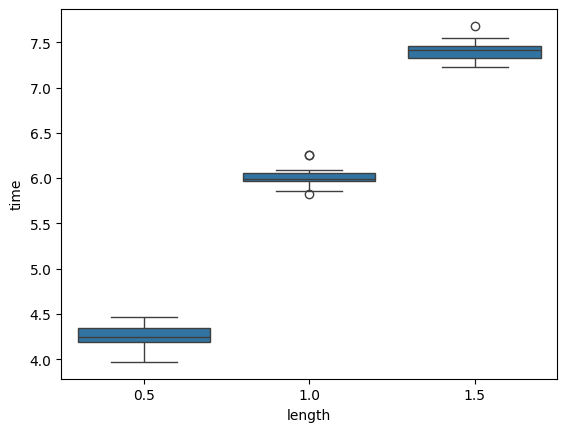

In [ ]:
sns.boxplot(x='length' , y='time', data=data)
plt.show()

Z boxplotu výše vidíme silnou závislost doby kmitu na délce kyvadla. Udělejme následující rozbor i u zbylých proměnných.



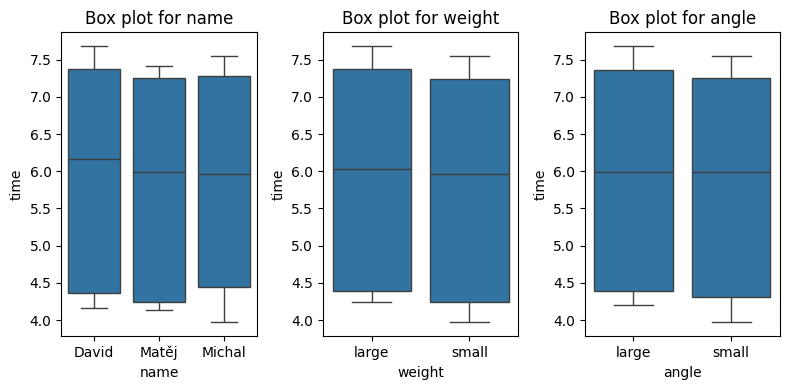

In [ ]:
# Create a figure and three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Box plot for length == 0.5
sns.boxplot(ax=axes[0], x='name', y='time', data=data)
axes[0].set_title("Box plot for name")

# Box plot for length == 1.0
sns.boxplot(ax=axes[1], x='weight', y='time', data=data)
axes[1].set_title("Box plot for weight")

# Box plot for length == 1.5
sns.boxplot(ax=axes[2], x='angle', y='time', data=data)
axes[2].set_title("Box plot for angle")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Provedli jsme však podobné boxploty i pro zbylé proměnné `name`, `weight` a `angle`, efekt jednotlivých atributů se zdá nevýznamný. Boxploty pro jednotlivé úrovně daných proměnných jsou velmi roztáhlé s podobným rozsahem i průměrem, tudíž se zdá, že efekt jednotlivých úrovní proměnných je v průměru stejný, resp. žádný. Situace však bude odlišná, budeme-li zkoumat vliv jednotlivých proměnných v závislosti na hodnotě délky. Jak totiž vidímě výše, se zvyšující délkou se čas kmitu prodlužuje. Zkoumejme tedy jednotlivé proměnné v závislosti na hodnotě veličiny `length`.

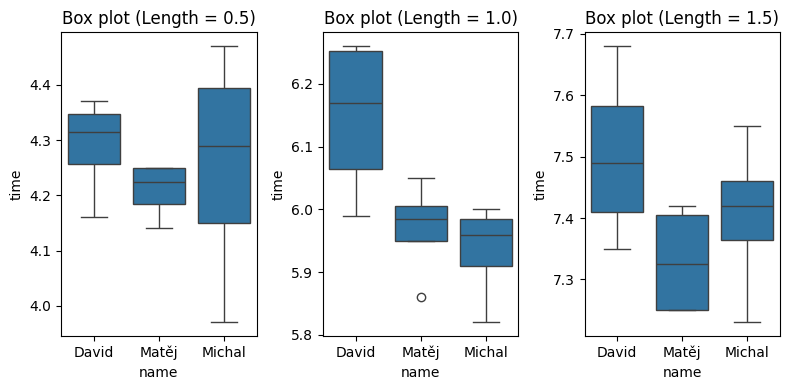

In [ ]:
# Create a figure and three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Box plot for length == 0.5
sns.boxplot(ax=axes[0], x='name', y='time', data=data[data['length'] == 0.5])
axes[0].set_title("Box plot (Length = 0.5)")

# Box plot for length == 1.0
sns.boxplot(ax=axes[1], x='name', y='time', data=data[data['length'] == 1.0])
axes[1].set_title("Box plot (Length = 1.0)")

# Box plot for length == 1.5
sns.boxplot(ax=axes[2], x='name', y='time', data=data[data['length'] == 1.5])
axes[2].set_title("Box plot (Length = 1.5)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Zde můžeme vidět, že operátor Davídek měřil vždy delší časy, zatímco u Matýska a Míši již rozdíl není tak jasný a bylo by třeba jej dále zkoumat. Obecně by se ale dalo říct, že proměnná `name` by mohla mít na dobu kyvu vliv.

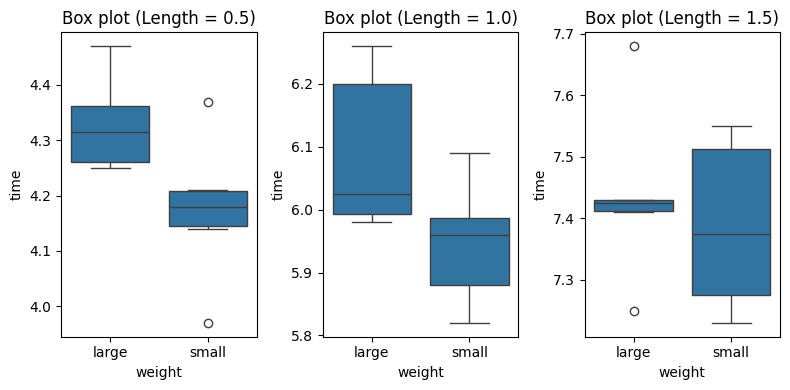

In [ ]:
# Create a figure and three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Box plot for length == 0.5
sns.boxplot(ax=axes[0], x='weight', y='time', data=data[data['length'] == 0.5])
axes[0].set_title("Box plot (Length = 0.5)")

# Box plot for length == 1.0
sns.boxplot(ax=axes[1], x='weight', y='time', data=data[data['length'] == 1.0])
axes[1].set_title("Box plot (Length = 1.0)")

# Box plot for length == 1.5
sns.boxplot(ax=axes[2], x='weight', y='time', data=data[data['length'] == 1.5])
axes[2].set_title("Box plot (Length = 1.5)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Z tohoto boxplotu se zdá, že hmotnost by též mohla mít vliv na dobu kyvu.

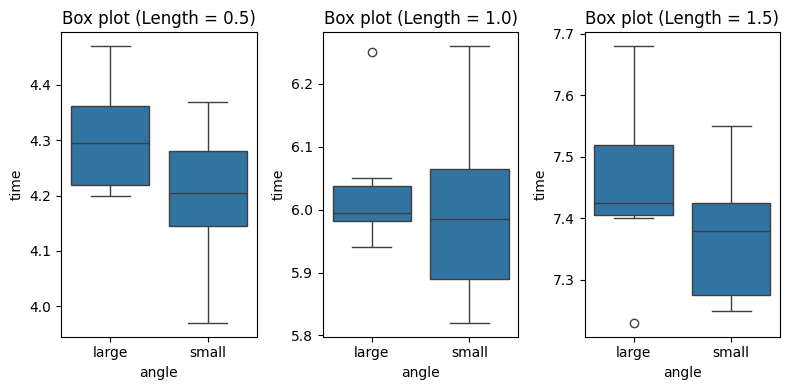

In [ ]:
# Create a figure and three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Box plot for length == 0.5
sns.boxplot(ax=axes[0], x='angle', y='time', data=data[data['length'] == 0.5])
axes[0].set_title("Box plot (Length = 0.5)")

# Box plot for length == 1.0
sns.boxplot(ax=axes[1], x='angle', y='time', data=data[data['length'] == 1.0])
axes[1].set_title("Box plot (Length = 1.0)")

# Box plot for length == 1.5
sns.boxplot(ax=axes[2], x='angle', y='time', data=data[data['length'] == 1.5])
axes[2].set_title("Box plot (Length = 1.5)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Z tohoto boxplotu už však tak jednoznační být nemůžeme, ba naopak. Nebylo by příliš zcestné se domnívat, že v regresním modelu bude hodnota veličiny `angle` nevýznamná.

Nakonec prověďme interaction plot času podle pořadí.

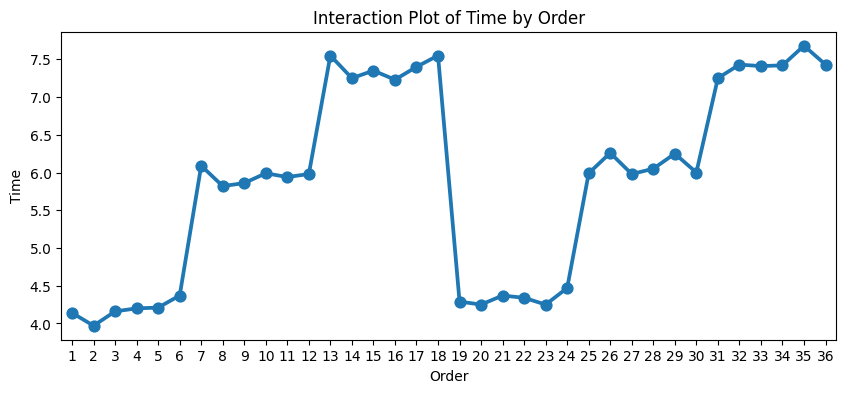

In [ ]:
plt.figure(figsize=(10, 4))
sns.pointplot(x='order', y='time', data=data)
plt.title('Interaction Plot of Time by Order')
plt.ylabel('Time')
plt.xlabel('Order')
plt.show()

Zde můžee vidět, že měření bylo poměrně konzistrentní a dává nám jistou naději, že heteroskedasticita v čase v tomto experimentu přítomna není.

##Q3.
Focus especially on the factors length of rope, number of weights, and angles. operator with its own rope type is a nuisance parameter. Run one-way analysis of variance for length. Are there significant differences in means of frequency (or period)? For each factor: perform Tukey HSD and Fisher LSD test for pairwise comparison of means of individual groups.


In [ ]:
model_length = smf.ols("time ~ length", data=data).fit()
print(anova_lm(model_length))

            df     sum_sq    mean_sq            F        PR(>F)
length     1.0  59.945204  59.945204  2374.201927  4.811550e-33
Residual  34.0   0.858451   0.025249          NaN           NaN


In [ ]:
model_weight = smf.ols("time ~ weight", data=data).fit()
print(anova_lm(model_weight))

            df     sum_sq   mean_sq         F    PR(>F)
weight     1.0   0.117878  0.117878  0.066043  0.798737
Residual  34.0  60.685778  1.784876       NaN       NaN


In [ ]:
model_angle = smf.ols("time ~ angle", data=data).fit()
print(anova_lm(model_angle))

            df     sum_sq   mean_sq         F    PR(>F)
angle      1.0   0.049878  0.049878  0.027913  0.868302
Residual  34.0  60.753778  1.786876       NaN       NaN


Základní analýzou rozptylu, kdy jsme "ladili" model pouze v závislosti na jedné proměnné, jsme zjistili silnou lineární závislost na délce. Nikoliv však na hmonosti či úhlu (na hladině význanosti α=0,05). Naše domněnky ze základní analýzy z předchozí sekce proto byly poměrně trefné.

In [ ]:
# Perform Tukey HSD for pairwise comparison
print("Tukey HSD for 'length':")
tukey_hsd_length = pairwise_tukeyhsd(data['time'], data['length'])
print(tukey_hsd_length)

print("\nTukey HSD for 'weight':")
tukey_hsd_weight = pairwise_tukeyhsd(data['time'], data['weight'])
print(tukey_hsd_weight)

print("\nTukey HSD for 'angle':")
tukey_hsd_angle = pairwise_tukeyhsd(data['time'], data['angle'])
print(tukey_hsd_angle)

# Fisher LSD post-hoc test (performed manually using t-tests for each pair)
print("\nFisher LSD (manual pairwise t-tests):")

# Length pairs
print("\n Fisher LSD for 'length':")
unique_lengths = data['length'].unique()
for i in range(len(unique_lengths)):
    for j in range(i+1, len(unique_lengths)):
        group1 = data[data['length'] == unique_lengths[i]]['time']
        group2 = data[data['length'] == unique_lengths[j]]['time']
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"    Length {unique_lengths[i]} vs {unique_lengths[j]}: t={t_stat:.4f}, p={p_val:.4f}")

# Weight pairs
print("\n Fisher LSD for 'weight':")
group1 = data[data['weight'] == 'small']['time']
group2 = data[data['weight'] == 'large']['time']
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"    Weight small vs large: t={t_stat:.4f}, p={p_val:.4f}")

# Angle pairs
print("\n Fisher LSD for 'angle':")
group1 = data[data['angle'] == 'small']['time']
group2 = data[data['angle'] == 'large']['time']
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"    Angle small vs large: t={t_stat:.4f}, p={p_val:.4f}")

Tukey HSD for 'length':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.5    1.0   1.7658   0.0 1.6326  1.899   True
   0.5    1.5   3.1608   0.0 3.0276  3.294   True
   1.0    1.5    1.395   0.0 1.2618 1.5282   True
-------------------------------------------------

Tukey HSD for 'weight':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 large  small  -0.1144 0.7987 -1.0195 0.7906  False
---------------------------------------------------

Tukey HSD for 'angle':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
    10     20   0.0744 0.8683 -0.8311  0.98  False
--------------------------------------------------

Fisher LSD (manual pairwise t-tests):

 Fisher LSD for 'le

Jak můžeme vidět, obě dvě metody potvrdili významný rozdíl v průměrech doby kmitů pro jednotlivé hodnoty délky kyvadla. Naopak také zamítly významný rozdíl pro různé hodnoty hmotnosti nebo úhlu. Obojí potvrzují naše domněnky z boxplotů z předchozích kapitol.

##Q4.
Analyse the data using ANOVA (take all variables as a factor).

* With the assumption that each of the participants in the experiment forms a block.
* Discuss results, verify assumptions, plot QQ-plot, residuals x fitted values, residuals x factor levels.
* Discuss the effect of the experimental design and the evolution of the residuals over time (order of measurements).
* If the measured data do not meet the assumptions for using ANOVA, discuss possible transformations (logarithmic, Box-Cox, ...) and the reason why the data do not meet the assumptions?


In [ ]:
model_factor = smf.ols("time ~ angle + weight + C(length) + name", data=data).fit()

anova_lm(model_factor)

,df,sum_sq,mean_sq,F,PR(>F)
weight,1.0,0.117878,0.117878,12.324434,1.482474e-03
C(length),2.0,60.220239,30.110119,3148.092685,1.228029e-34
name,2.0,0.138289,0.069144,7.229235,2.835906e-03
angle,1.0,0.049878,0.049878,5.214854,2.990512e-02
Residual,29.0,0.277372,0.009565,NaN,NaN


Jak můžeme vidět, v tomto komplexnějším modelu jsme popsali daleko více rozptylu, než při jednoduché ANOVA výše. Tento efekt je jistě přirozený. Na druhou stranu však vyšly jako signifikantní všechny proměnné na hladině významnosti 0,05, což by se fyzikům zřejmě tolik nelíbilo. Ověřme dále předpoklady modelu, to jest normalitu reziduí a homoskedasticitu.

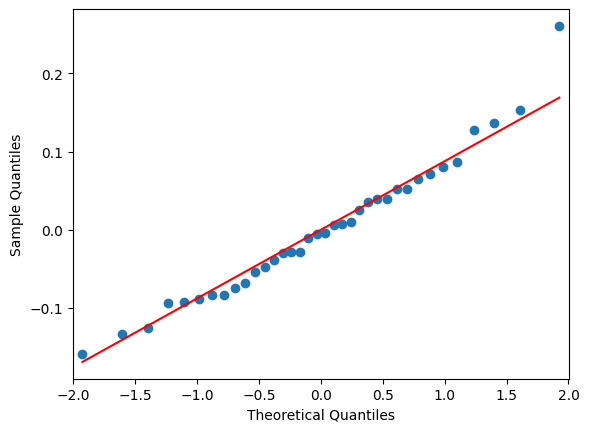

In [ ]:
sm.qqplot(model_factor.resid, line='s')
plt.show()

Zdá se, že i rezidua mají pěkné normální rozdělení až na chvost. Proveďme tedy i Lillieforsův test pro ověření normality reziduí, jestli danou domněnku dokážeme potvrdit i statistickým testem.

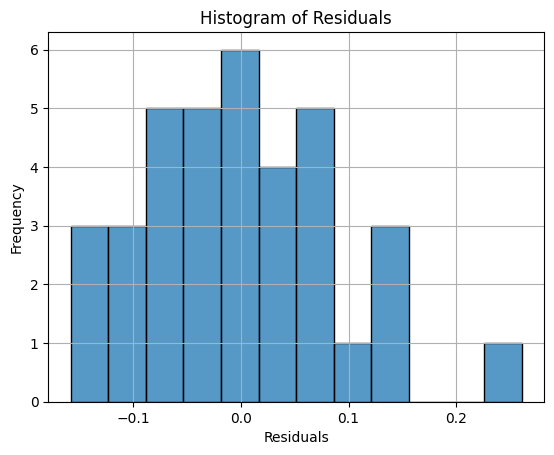

Lilliefors Test p-value: 0.9262645108249297
    -> residuals can be normally distributed on significance level 0,05.


In [ ]:
sns.histplot(model_factor.resid, bins=12)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

lilliefors_stat, lilliefors_pvalue = lilliefors(model_factor.resid)
print('Lilliefors Test p-value:', lilliefors_pvalue)

if lilliefors_pvalue < 0.05:
    print("    -> residuals are not normally distributed on significance level 0,05.")
else:
    print("    -> residuals can be normally distributed on significance level 0,05.")

Vidíme, že s p-hodnotou 0.9262 nemůžeme zamítnout normalitu reziduí, proto můžeme rezidua pokládat za normálně rozdělená. Zkoumejme dále rezidua vůči odhadnutým hodnotám doby kmitu, jestli mají nulovou střední hodnotu a konstatní rozptyl.

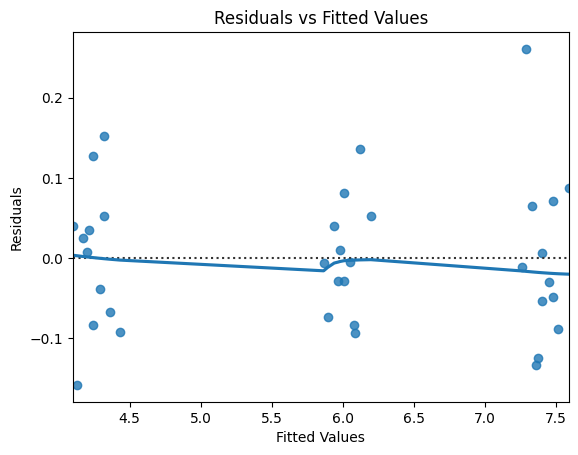

In [ ]:
plt.figure()
sns.residplot(x=model_factor.fittedvalues, y=model_factor.resid, lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Vidíme, že jsou poměrně hezky rozprostřená okolo osy $y=0$. Dále ještě zkoumejme homoskedasticitu, resp. rezidua v závislosti na pořadí pozorování.

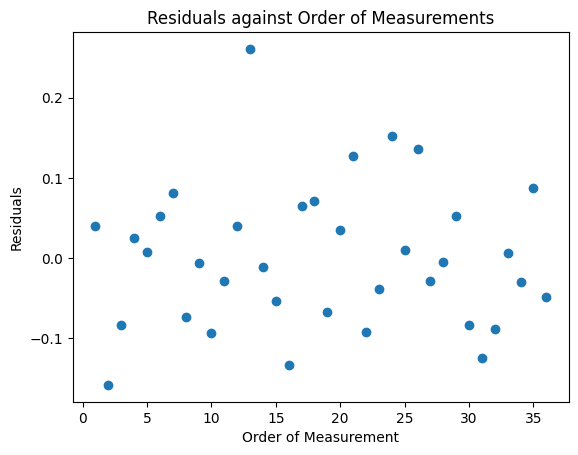

In [ ]:
plt.plot(data['order'], model_factor.resid, marker='o', linestyle='none')
plt.xlabel('Order of Measurement')
plt.ylabel('Residuals')
plt.title('Residuals against Order of Measurements')
plt.show()

Můžeme tedy potvrdit, že rozptyl se v čase neměnil. Dále ještě zkoumejme rezidua vůči jednotlivým hodnotám proměnných.

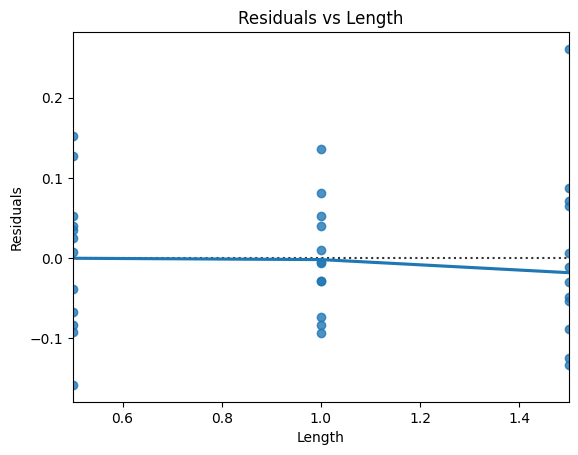

In [ ]:
sns.residplot(x=data['length'], y=model_factor.resid, lowess=True)
plt.title('Residuals vs Length')
plt.xlabel('Length')
plt.ylabel('Residuals')
plt.show()

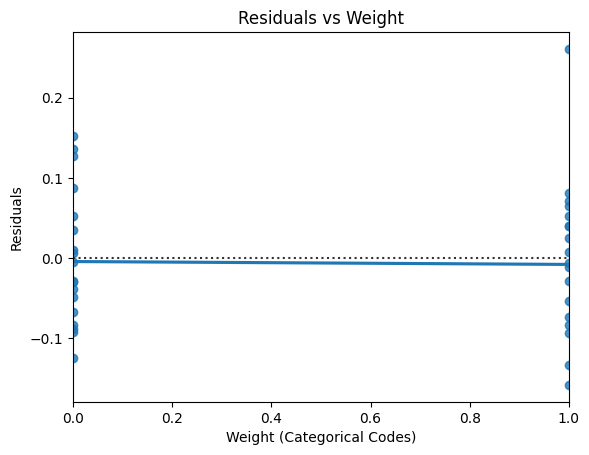

In [ ]:
plt.figure()
sns.residplot(x=data['weight'].cat.codes, y=model_factor.resid, lowess=True)  # Use cat.codes for numerical representation
plt.title('Residuals vs Weight')
plt.xlabel('Weight (Categorical Codes)')
plt.ylabel('Residuals')
plt.show()

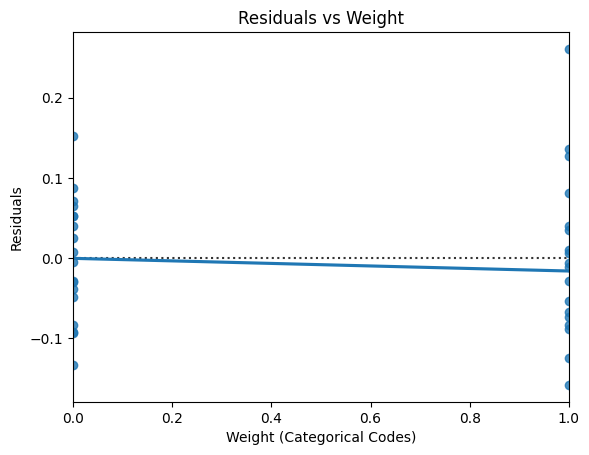

In [ ]:
plt.figure()
sns.residplot(x=data['angle'].cat.codes, y=model_factor.resid, lowess=True)  # Use cat.codes for numerical representation
plt.title('Residuals vs Weight')
plt.xlabel('Weight (Categorical Codes)')
plt.ylabel('Residuals')
plt.show()

In [ ]:
print(model_factor.resid.idxmax())

13


Ve všech případech se ukazuje, že jedno pozorování, konkrétně číslo 13, má netypicky velký rozptyl a trochu kazí nulovou střední hodnotu reziduí. Jinak je však vše v pořádku a rezidua nevykazují nějakou anomálii či rozpor s předpoklady modelu. Zkoumejme na konec ještě pákové body.

In [ ]:
# Get the leverage values
influence = model_factor.get_influence()
leverage = influence.hat_matrix_diag

# Calculate the threshold for high leverage points
k = len(model_factor.params) - 1  # Number of predictors (excluding intercept)
n = len(data)               # Number of observations
threshold = 2 * (k + 1) / n

# Identify high leverage points
high_leverage_indices = [i for i, h in enumerate(leverage) if h > threshold]

# Print results
if not high_leverage_indices:
    print("There is no leverage point.")
else:
    print("High leverage points found at observation indices:", high_leverage_indices)

There is no leverage point.


Žádné pákové body jsme ale nenašli.


##Q5
Choose one level of weights factor and *even if it does not meet the assumptions for using ANOVA*, solve the following:
   * Calculate the power of the test in the ANOVA for 3 different lenghts of ropes and **n** operators.
   * Assume the standard deviation of the disturbances to be a certain value for the experiment conducted
     and the maximum (for us significant) difference we want to detect is 0.1s.
     Calculate the number of operators needed for the power of the resulting test to be greater than 0.9.

Nejprve odhadneme směrodatnou odchylku dat. Jako rozumný přístup se jeví spočítat ji pro jednotlivé délky kyvadla zvlášť a tyto hodnoty pak zprůměrovat, jelikož ANOVA srovnává rozptyly mezi jednotlivými skupinami.



In [ ]:
# Filter data for one weight category
data_weight = data[data['weight'] == 'large']

# Group data by 'length' and compute the deviations
std_devs = data_weight.groupby('length')['time'].std()

# Compute the mean of the standard deviations
mean_std_dev = std_devs.mean()

# Output the result
print(f"Mean standard deviation across all rope lengths for one weight: {mean_std_dev}")

Mean standard deviation across all rope lengths for one weight: 0.11792687014483916


In [ ]:
from statsmodels.stats.power import FTestAnovaPower

effect_size_delta = 0.1  # Maximum difference we want to detect in seconds
std_dev = mean_std_dev  # Standard deviation of disturbances
effect_size = effect_size_delta / std_dev  # Calculate the effect size

# Power analysis for ANOVA
power = 0.9  # Desired power of the test
alpha = 0.05  # Significance level
num_groups = 3  # 3 levels for rope length

# Create the power analysis object
power_analysis = FTestAnovaPower()
operator_sample_sizes = [2, 3, 5, 7, 10, 15]

# Calculate the power for each operator sample size
results = []

for n in operator_sample_sizes:
    power_for_n = power_analysis.solve_power(effect_size=effect_size, nobs=3*n, alpha=alpha, power=None, k_groups=num_groups) #each operator does one measurement of each rope length
    results.append((n, power_for_n))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Number of Operators (n)', 'Power of Test'])
print(results_df)

# Calculate the number of operators required for the desired power
sample_size = power_analysis.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power, k_groups=num_groups)

# Output the result
print(f"Number of operators required for power of 0.9: {int(np.ceil(sample_size/3))}")

   Number of Operators (n)  Power of Test
0                        2       0.195783
1                        3       0.406512
2                        5       0.735898
3                        7       0.901138
4                       10       0.981686
5                       15       0.999236
Number of operators required for power of 0.9: 7


Počet měření jsme uvažovali jako 3*#operátorů, jelikož předpokládáme, že každý operátor provede jedno měření pro každou délku kyvadla. Výsledek nám říká, že pokud bychom chtěli detekovat rozdíl 0.1s pro tři různé délky kyvadla se sílou testu 0.9, potřebovali bychom alespoň 7 operátorů.


##Q6
Create a regression model where you do not consider blocks and both length of the rope and angles are quantitative variables.
* Try to add a squared variable to the model and compare the two regression models with each other and select the more appropriate one.
* Check the assumptions for using the chosen model.


In [ ]:
# Replace 'small' with 10 and 'large' with 20 in the 'angle' column
data['angle'] = data['angle'].replace({'small': 10, 'large': 20})
data['angle'] = data['angle'].astype('int64')

<ipython-input-26-c8726447c5d1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['angle'] = data['angle'].replace({'small': 10, 'large': 20})
<ipython-input-26-c8726447c5d1>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['angle'] = data['angle'].replace({'small': 10, 'large': 20})


Nafitujeme první model.

In [ ]:
model_linear = smf.ols(formula='time ~ length + angle + weight', data=data).fit()

print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     928.3
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           3.53e-31
Time:                        13:20:31   Log-Likelihood:                 20.083
No. Observations:                  36   AIC:                            -32.17
Df Residuals:                      32   BIC:                            -25.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6786      0.101     

Jelikož jedinou možností, kde bychom mohli přidat kvadratickou závislost, je délka, podívejme se na partial residual plot, kde bychom potřebu kvadrátu této veličiny měli odhalit.

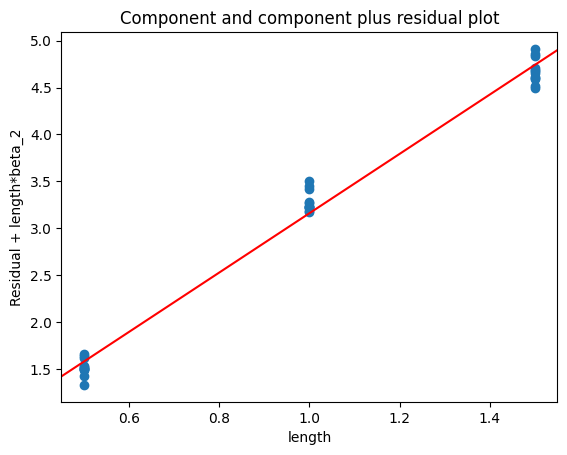

In [ ]:
fig, ax = plt.subplots()
sm.graphics.plot_ccpr(model_linear, 'length', ax=ax)
ax.get_lines()[1].set_color('red')  # Set color for the regression line
plt.show()

Zde vidíme, že kvadratický člen by byl v modelu vhodný. Nalaďme proto pro srovnání druhý model s kvadratickým členem.

In [ ]:
model_squared = smf.ols(formula='time ~ length + I(length**2) + angle + weight', data=data).fit()

print(model_squared.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1126.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           4.51e-33
Time:                        13:21:35   Log-Likelihood:                 29.223
No. Observations:                  36   AIC:                            -48.45
Df Residuals:                      31   BIC:                            -40.53
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0606      0.158     

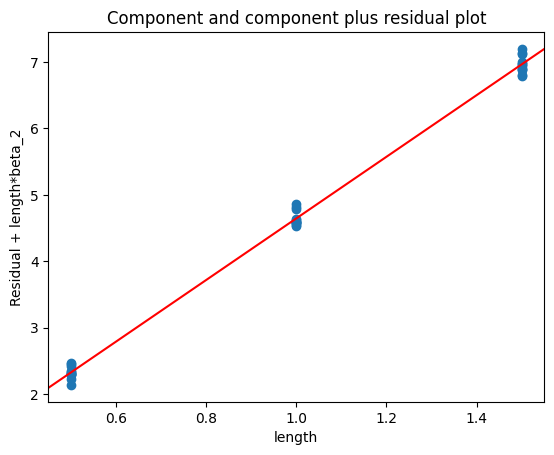

In [ ]:
fig, ax = plt.subplots()
sm.graphics.plot_ccpr(model_squared, 'length', ax=ax)
ax.get_lines()[1].set_color('red')  # Set color for the regression line
plt.show()

Zde vidíme, že model je dle základních statistik lepší a i graficky lépe prokládá data. Porovnejme tedy základní statistiky jednotlivých modelů.

In [ ]:
# Compare Adjusted R-squared
print(f"Adjusted R-squared (Linear Model): {model_linear.rsquared_adj}")
print(f"Adjusted R-squared (Squared Model): {model_squared.rsquared_adj}")

# Compare AIC and BIC values
print(f"AIC (Linear Model): {model_linear.aic}")
print(f"AIC (Squared Model): {model_squared.aic}")

print(f"BIC (Linear Model): {model_linear.bic}")
print(f"BIC (Squared Model): {model_squared.bic}")

Adjusted R-squared (Linear Model): 0.9875756060913461
Adjusted R-squared (Squared Model): 0.9922817995303161
AIC (Linear Model): -32.16511386926409
AIC (Squared Model): -48.44696694259808
BIC (Linear Model): -25.83103811543965
BIC (Squared Model): -40.529372250317536


Vidíme, že Akaikeho a Bayesovo informační kritérium vykazují velký rozdíl, nárust hodnoty $R^2$ statistiky už tak významný není. Jelikož se však jedná o modely vnořené, lze použít metodu ANOVA k statistickému posouzení signifikance rozdílu modelů.

In [ ]:
anova_result = anova_lm(model_linear, model_squared)
print("ANOVA Results:")
anova_result

ANOVA Results:


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,32.0,0.690696,0.0,NaN,NaN,NaN
1,31.0,0.415661,1.0,0.275035,20.512086,0.000082


Ze srovnání těchto dvou modelů vyplývá, že model s kvadratickým členem lépe popisuje variabilitu v datech. Pro klid v srdci také zkoumejme hodnost designové matice, přestože se nezdá, že by měla být přítomna kovariance.

In [ ]:
design_matrix_squared = model_squared.model.exog
rank_squared = np.linalg.matrix_rank(design_matrix_squared)

print(f'Rank of the design matrix in "Squared" model: {rank_squared}')

num_columns_squared = design_matrix_squared.shape[1]

print(f'Number of columns in "Squared" model: {num_columns_squared}')

Rank of the design matrix in "Squared" model: 5
Number of columns in "Squared" model: 5


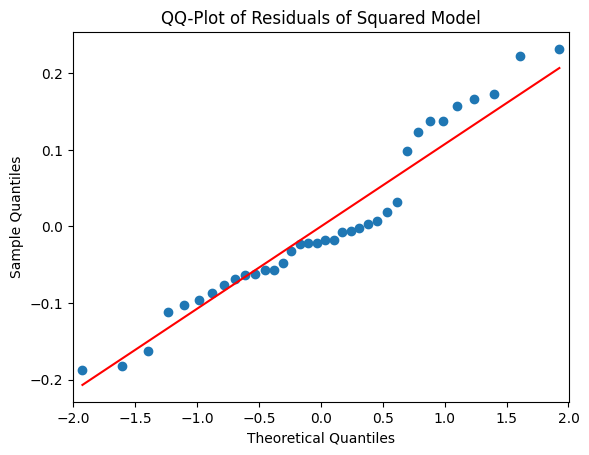

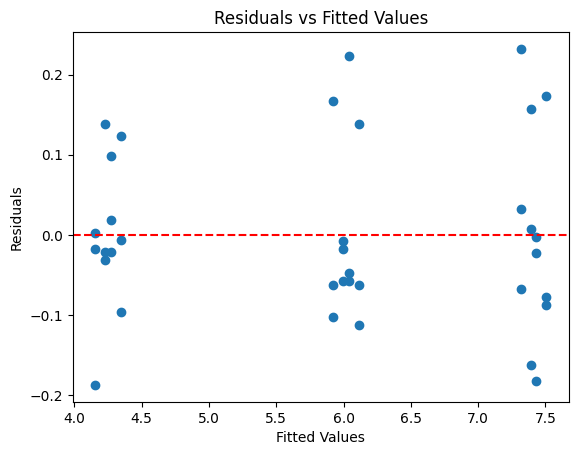

In [ ]:
residuals = model_squared.resid
fitted_values = model_squared.fittedvalues

# QQ-Plot for checking normality of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot of Residuals of Squared Model')
plt.show()

# Residuals vs Fitted Values plot
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

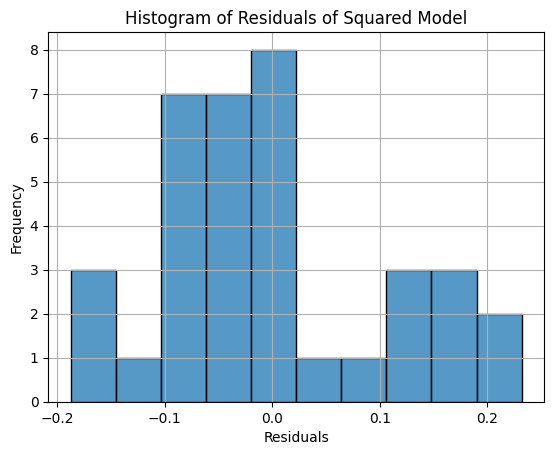

Lilliefors Test p-value: 0.014241824536207509
    -> residuals are not normally distributed on significance level 0,05.


In [ ]:
sns.histplot(model_squared.resid, bins=10)
plt.title('Histogram of Residuals of Squared Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

lilliefors_stat, lilliefors_pvalue = lilliefors(model_squared.resid)
print('Lilliefors Test p-value:', lilliefors_pvalue)

if lilliefors_pvalue < 0.05:
    print("    -> residuals are not normally distributed on significance level 0,05.")
else:
    print("    -> residuals can be normally distributed on significance level 0,05.")

Lilieforsův test normality zamítá hypotézu o normálním rozdělení reziduí, tudíž model s kvadratickým členem nesplňuje předpoklady. Ověřme však pro jistotu i normalitu lineárního modelu.

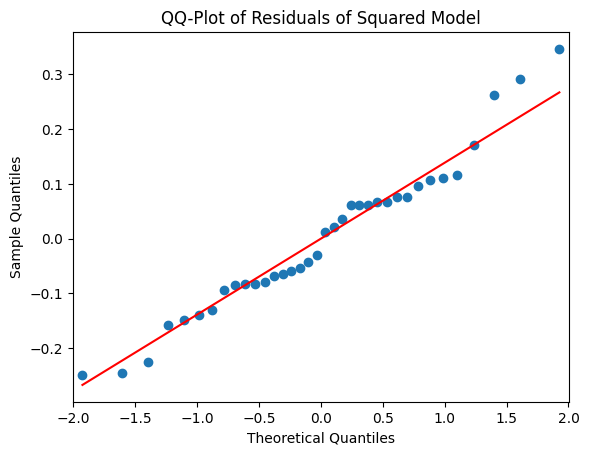

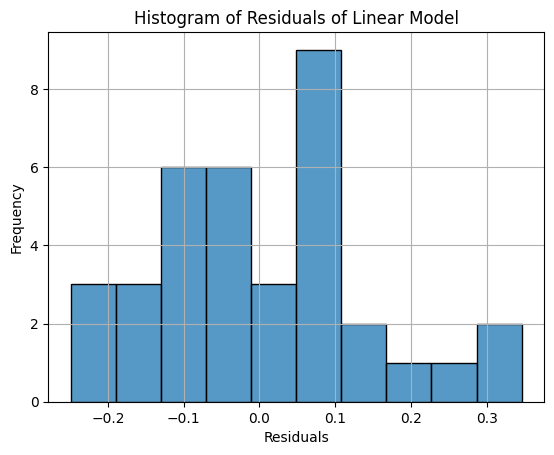

Lilliefors Test p-value: 0.5673621033801475
    -> residuals can be normally distributed on significance level 0,05.


In [ ]:
# QQ-Plot for checking normality of residuals
sm.qqplot(model_linear.resid, line='s')
plt.title('QQ-Plot of Residuals of Squared Model')
plt.show()


sns.histplot(model_linear.resid, bins=10)
plt.title('Histogram of Residuals of Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

lilliefors_stat, lilliefors_pvalue = lilliefors(model_linear.resid)
print('Lilliefors Test p-value:', lilliefors_pvalue)

if lilliefors_pvalue < 0.05:
    print("    -> residuals are not normally distributed on significance level 0,05.")
else:
    print("    -> residuals can be normally distributed on significance level 0,05.")

Model se všemi lineárními složkami předpoklady splňuje a volíme proto tento model bez kvadratického členu.

##Q7
If you based your previous answers on the p-value, discuss following.  Does p-value provide a good measure of evidence regarding a model or hypothesis?

V případě porovnání dvou modelů s použitím ANOVY poskytuje p hodnota dobrou míru průkaznosti ohledně hypotézy jestli druhý model lépe sedí na naše data. Ovšem neříká nám nic o tom jak dobré modely skutečně jsou. S ohledem na test normality reziduí model s kvadratickým členem nezvolíme.

Note: In case the blocks are highly dominant and none of the other variables appear significant,
      use only the "operator with the best data for academic purposes" for the resulting analysis.